# Course Work: Result Analysis
Dmytro Geleshko

## Import

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Config

In [15]:
np.random.seed(9106)

pd.set_option("display.max_columns", None)

## Data
### Load

In [16]:
df = pd.read_csv("../test2.txt", dtype=np.int32)
df

,iGraphSize,iThreads,seqTime,seqDistance,parTime,parDistance
0,64,2,0,2,1,2
1,64,4,0,3,1,3
2,64,6,0,6,4,6
3,64,8,0,5,3,5
4,64,10,0,6,3,6
...,...,...,...,...,...,...
787,16384,8,3653,13,1108,13
788,16384,10,4581,16,1116,16
789,16384,12,3812,13,966,13
790,16384,14,4158,13,1179,13


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   iGraphSize   792 non-null    int32
 1   iThreads     792 non-null    int32
 2   seqTime      792 non-null    int32
 3   seqDistance  792 non-null    int32
 4   parTime      792 non-null    int32
 5   parDistance  792 non-null    int32
dtypes: int32(6)
memory usage: 18.7 KB


### Comapare Path Distance

In [18]:
compare_test = (df["seqDistance"] == df["parDistance"]).sum()

print("Same distance:\t\t", compare_test)
print("Different distance:\t", len(df) - compare_test)

Same distance:		 792
Different distance:	 0


Це означає що послідовна і паралельна версії алгоритму знаходять шлях з однаковою відстаню для усіх посталених задач. Це також доводить правильність роботи паралельного алгоритму.

### Drop distane columns and calculate the speedup

In [19]:
df.drop(columns=["seqDistance", "parDistance"], inplace=True)

eps = 0.001
df["speedup"] =  (df["seqTime"] + eps) / (df["parTime"] + eps)
df

,iGraphSize,iThreads,seqTime,parTime,speedup
0,64,2,0,1,0.000999
1,64,4,0,1,0.000999
2,64,6,0,4,0.000250
3,64,8,0,3,0.000333
4,64,10,0,3,0.000333
...,...,...,...,...,...
787,16384,8,3653,1108,3.296929
788,16384,10,4581,1116,4.104836
789,16384,12,3812,966,3.946167
790,16384,14,4158,1179,3.526715


In [20]:
print("Min speedup:\t", df["speedup"].min())
print("Max speedup:\t", df["speedup"].max())

Min speedup:	 4.999750012499375e-05
Max speedup:	 4.466333201650296


### View the speedup

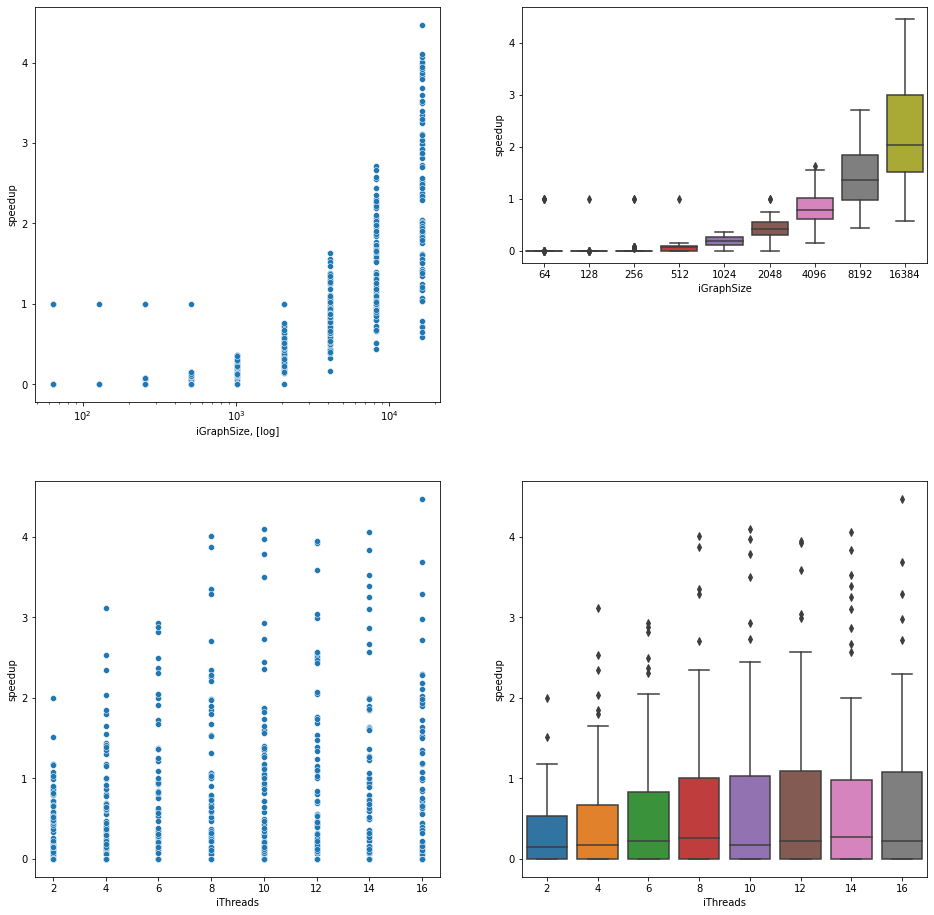

In [21]:
plt.rcParams["figure.figsize"] = (16, 16)

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="iGraphSize", y="speedup")
plt.xscale("log")
plt.xlabel("iGraphSize, [log]")
plt.subplot(3, 2, 2)
sns.boxplot(data=df, x="iGraphSize", y="speedup")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="iThreads", y="speedup")
plt.xlabel("iThreads")
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="iThreads", y="speedup")

plt.show()

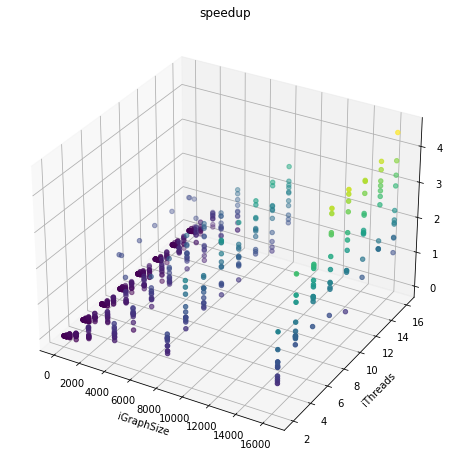

In [22]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection="3d")

ax.scatter(df["iGraphSize"], df["iThreads"], df["speedup"], c=df["speedup"], cmap="viridis")

plt.xlabel("iGraphSize")
plt.ylabel("iThreads")
plt.title("speedup")
plt.show()

In [23]:
df_mean = df.groupby(["iGraphSize", "iThreads"]).agg({"speedup": "mean"})["speedup"].unstack()
df_mean

iThreads,2,4,6,8,10,12,14,16
iGraphSize,,,,,,,,
64,0.000334,0.000536,0.000351,0.091303,0.000548,0.091348,0.091265,0.091356
128,0.000152,0.000209,0.000193,0.000319,0.000302,0.000243,0.000182,0.091103
256,0.005036,0.017549,0.000205,0.118530,0.112069,0.000231,0.014725,0.022274
512,0.063722,0.059487,0.084311,0.048658,0.070181,0.052208,0.089362,0.145418
1024,0.130693,0.187538,0.229065,0.207675,0.168406,0.206477,0.222997,0.167072
2048,0.312330,0.327663,0.453626,0.389040,0.341285,0.491507,0.580037,0.601580
4096,0.553287,0.597212,0.741673,0.835336,1.033618,0.945350,0.964916,0.994127
8192,0.736935,1.221851,1.219969,1.565328,1.421126,1.737860,1.661784,1.833432
16384,1.070668,1.774075,2.274898,2.569117,2.706893,2.776103,2.794713,2.425413


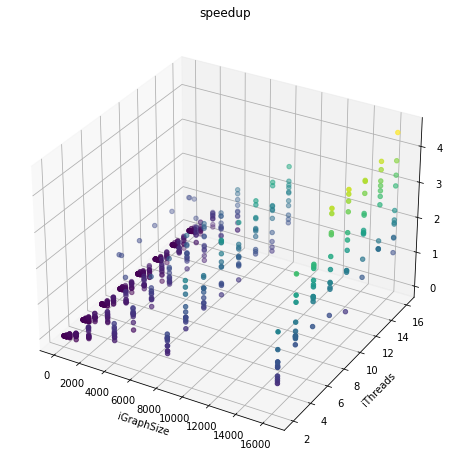

In [24]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection="3d")

ax.scatter(df["iGraphSize"], df["iThreads"], df["speedup"], c=df["speedup"], cmap="viridis")

plt.xlabel("iGraphSize")
plt.ylabel("iThreads")
plt.title("speedup")
plt.show()

## Find the exact realtion

In [25]:
X = df[["iGraphSize", "iThreads"]]
X = X / X.max()
X = X.to_numpy()
y = df["speedup"].to_numpy()

X = X / X.max(axis=1, keepdims=True)

print("X shape:\t", X.shape)
print("y shape:\t", y.shape)

X shape:	 (792, 2)
y shape:	 (792,)


In [26]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([1.75528968, 0.3067702 ])